# Exercise 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
X = iris['data'][:, (2, 3)]
y = iris['target']

In [4]:
indexes = y != 2

X = X[indexes]
y = y[indexes]

In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

C = 5
alpha = 1 / (C * len(X))

lin_svc = LinearSVC(loss='hinge', C=C, random_state=42)
svc = SVC(kernel='linear', C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

lin_svc.fit(X_scaled, y)
svc.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)

print(f'LinearSVC: {lin_svc.intercept_}, {lin_svc.coef_}')
print(f'SVC: {svc.intercept_}, {svc.coef_}')
print(f'SGD(alpha={alpha}): {sgd_clf.intercept_}, {sgd_clf.coef_}')

LinearSVC: [0.28475098], [[1.05364854 1.09903804]]
SVC: [0.31896852], [[1.1203284  1.02625193]]
SGD(alpha=0.002): [0.117], [[0.77714169 0.72981762]]


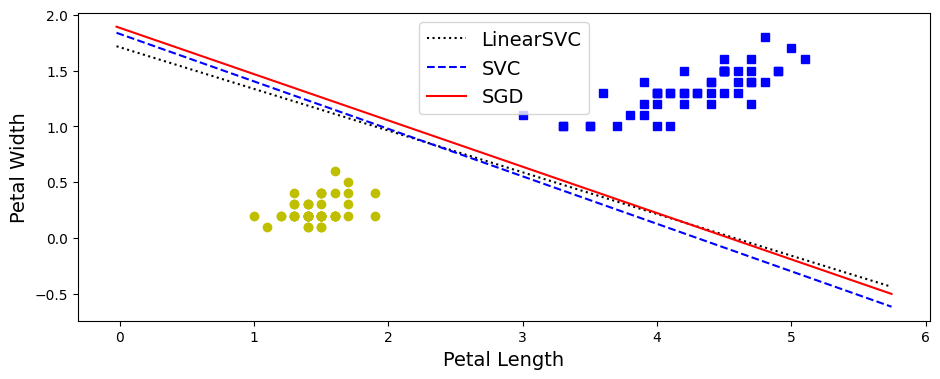

In [6]:
w1 = -lin_svc.coef_[0, 0]/lin_svc.coef_[0, 1]
b1 = -lin_svc.intercept_[0]/lin_svc.coef_[0, 1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

s = 2

line1 = scaler.inverse_transform([[-s, -s * w1 + b1], [s, s * w1 + b1]])
line2 = scaler.inverse_transform([[-s, -s * w2 + b2], [s, s * w2 + b2]])
line3 = scaler.inverse_transform([[-s, -s * w3 + b3], [s, s * w3 + b3]])

plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label='LinearSVC')
plt.plot(line2[:, 0], line2[:, 1], "b--", label='SVC')
plt.plot(line3[:, 0], line3[:, 1], "r-", label='SGD')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.show()

# Exercise 9

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# import and split dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version='1', cache=True, as_frame=False)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

/Users/ivanosipchyk/dev/studies/chapter_5/venv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
# train basic model
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

In [ ]:
# compute accuracy
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

In [ ]:
# scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train.astype(np.float32))

In [ ]:
# train basic model on scaled features
svc = LinearSVC(random_state=42)
svc.fit(X_scaled, y_train)

/Users/ivanosipchyk/dev/studies/chapter_5/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [ ]:
# compute accuracy
y_pred = svc.predict(X_scaled)
accuracy_score(y_train, y_pred)

0.9214

In [ ]:
# train kernel svc
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_scaled[:10000], y_train[:10000])

SVC()

In [ ]:
# compute accuracy

y_pred = svc.predict(X_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

In [ ]:
# implement randomized search on gamma and C parameters on smaller datasets
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

params = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svc, param_distributions=params, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=9.669880451059143, gamma=0.024794390140961797; total time=   0.4s
[CV] END ....C=9.669880451059143, gamma=0.024794390140961797; total time=   0.4s
[CV] END ....C=9.669880451059143, gamma=0.024794390140961797; total time=   0.4s
[CV] END ....C=2.010472401361615, gamma=0.008422925388919802; total time=   0.4s
[CV] END ....C=2.010472401361615, gamma=0.008422925388919802; total time=   0.4s
[CV] END ....C=2.010472401361615, gamma=0.008422925388919802; total time=   0.4s
[CV] END ....C=3.238120879742479, gamma=0.002969475976963484; total time=   0.4s
[CV] END ....C=3.238120879742479, gamma=0.002969475976963484; total time=   0.4s
[CV] END ....C=3.238120879742479, gamma=0.002969475976963484; total time=   0.4s
[CV] END ....C=8.821622757657451, gamma=0.028989849714905015; total time=   0.4s
[CV] END ....C=8.821622757657451, gamma=0.028989849714905015; total time=   0.4s
[CV] END ....C=8.821622757657451, gamma=0.028989

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13ac96110>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x166dcdc50>},
                   verbose=2)

In [ ]:
# find best estimator
rnd_search_cv.best_estimator_

SVC(C=8.755521136553579, gamma=0.0013127208255404403)

In [ ]:
# train best estimator
rnd_search_cv.best_estimator_.fit(X_scaled, y_train)

SVC(C=8.755521136553579, gamma=0.0013127208255404403)

In [ ]:
# compute accuracy on train set
y_pred = rnd_search_cv.best_estimator_.predict(X_scaled)
accuracy_score(y_train, y_pred)

0.9990666666666667

In [ ]:
# compute accuracy on test set

X_test_scaled = scaler.transform(X_test.astype(np.float32))
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9727

# Exercise 10

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

X = housing.data
y = housing.target

In [6]:
# split training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# train LinearSVR
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

/Users/ivanosipchyk/dev/studies/chapter_5/venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=42)

In [12]:
# mse on tarining set
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9641780189948642

In [15]:
# randomized search for rbf kernel and C+gamma parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import reciprocal, uniform

svr = SVR(kernel='rbf')
params = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
rnd_srch = RandomizedSearchCV(svr, params, cv=3, verbose=2, n_iter=10, random_state=42)
rnd_srch.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   3.6s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   3.5s
[CV] END .....C=4.745401188473625, gamma=0.07969454818643928; total time=   3.6s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   3.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   3.4s
[CV] END .....C=8.31993941811405, gamma=0.015751320499779724; total time=   3.5s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.3s
[CV] END ....C=2.560186404424365, gamma=0.002051110418843397; total time=   3.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   3.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399484409787431; total time=   3.3s
[CV] END ....C=1.5808361216819946, gamma=0.05399

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13c24fcd0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13c601050>},
                   random_state=42, verbose=2)

In [16]:
# best estimator
rnd_srch.best_estimator_

SVR(C=4.745401188473625, gamma=0.07969454818643928)

In [19]:
# rmse on training set
import numpy as np

y_pred = rnd_srch.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.572752477078537

In [20]:
# evaluation on test set
y_pred = rnd_srch.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.5929168385528751